<a href="https://colab.research.google.com/github/mcschlatt/PracticalStatsForDS/blob/main/Practical_Stats_for_DS_Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [22]:
# enviro setup
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import scipy as sp
# import wquantiles # - result of pip install
!pip install wquantiles
import wquantiles

# show all rows
pd.set_option('display.max_columns', None)

In [23]:
# myDF = pd.read_csv('archive (6).zip')
state = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/state.csv')

# data overview
print(state.head())
print(state.value_counts())
print(state.info())

        State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA
State           Population  Murder.Rate  Abbreviation
Alabama         4779736     5.7          AL              1
Alaska          710231      5.6          AK              1
Arizona         6392017     4.7          AZ              1
Arkansas        2915918     5.6          AR              1
California      37253956    4.4          CA              1
Colorado        5029196     2.8          CO              1
Connecticut     3574097     2.4          CT              1
Delaware        897934      5.8          DE              1
Florida         18801310    5.8          FL              1
Georgia         9687653     5.7          GA              1
Hawaii          1360301     1.8          HI 

# Locational Measures - how central your data is; "Typical values"


In [24]:
# locational measures
# .describe - show 5 number summary + quartiles
print(state.describe())
print('population mean: ', state['Population'].mean())

         Population  Murder.Rate
count  5.000000e+01    50.000000
mean   6.162876e+06     4.066000
std    6.848235e+06     1.915736
min    5.636260e+05     0.900000
25%    1.833004e+06     2.425000
50%    4.436370e+06     4.000000
75%    6.680312e+06     5.550000
max    3.725396e+07    10.300000
population mean:  6162876.3


Use below metrics to make metrics less sensitive to outliers

 i.e. median, trimmed mean, weighted mean/median

In [25]:
# trimmed mean - param: proportion to cut; use scipy.stats
print('trimmed mean: ', sp.stats.trim_mean(state['Population'], 0.1))
# weighted mean
print('weighted mean: ', np.average(state['Murder.Rate'], weights=state['Population']))
# weighted median # -- pip install wquantiles - prompt installer
print('weighted median: ', wquantiles.median(state['Murder.Rate'], weights=state['Population']))

trimmed mean:  4783697.125
weighted mean:  4.445833981123393
weighted median:  4.4


# Variability / dispersion measures - how clustered/spread out the data is

**Basic Measures:**
- mean absolute deviation: avg of abs val of deviations from the mean
- variance: avg of squared deviations
- standard deviation: sqrt of the variance
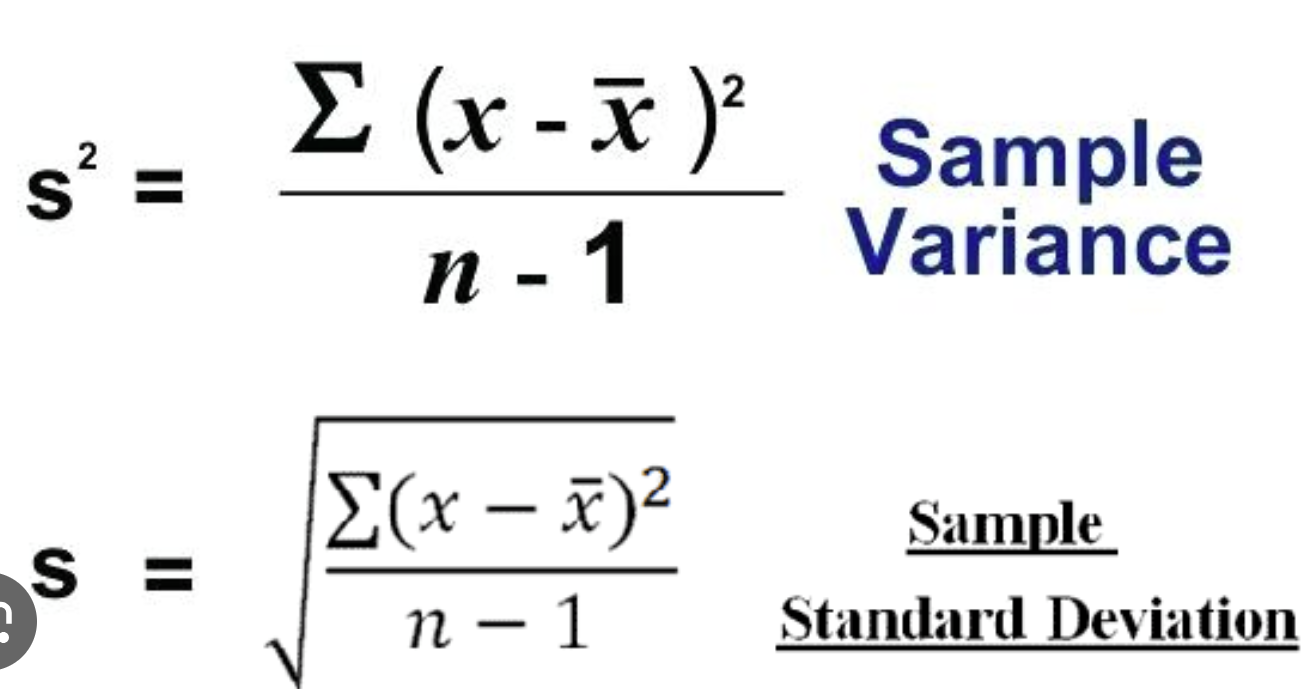


**Evaluating Measures of Variability**
- Standard Deviation and Variance (and Mean Abs Dev) are all non robust, the first 2 especially since the impact of outliers are squared

**What to use instead? More Robust/Resistant Measures**
- Median Absolute Deviation - median abs deviation form the median
- *Above can be used to calculate the trimmed standard dev

**Variability characteristics**
- Standard deviation > mean abs dev > median abs dev (assume normal distr)
- Sometimes the MAD is multiplied by a constant to scale with the standard dev


# Estimates based on percentiles - spread of sorted / ranked data as in order stats

Measures:
- range
- percentiles / quantiles
- IQR: 75th - 25th percentile
*quantiles are not perfect in real world data, may need to use weighted avg's to approach this; numpy.quantile should work for now


In [26]:
# call quantile fxn on df directly or a column of it
print(state[['Murder.Rate']].quantile([.05, .25, .5, .75, .95]))
# i.e. at 5% you get 1.6 murders per 100k people, at the median you get 4 murders every 100k

# compared to describe, you only get the 4 quantiles, but not specific ones like 5%
print(state['Murder.Rate'].describe())

      Murder.Rate
0.05        1.600
0.25        2.425
0.50        4.000
0.75        5.550
0.95        6.510
count    50.000000
mean      4.066000
std       1.915736
min       0.900000
25%       2.425000
50%       4.000000
75%       5.550000
max      10.300000
Name: Murder.Rate, dtype: float64


# Graphing with Percentile Measures

**Make a Boxplot for the quantiles**
- whiskers are the range of the data
- any data points outside are considered outliers

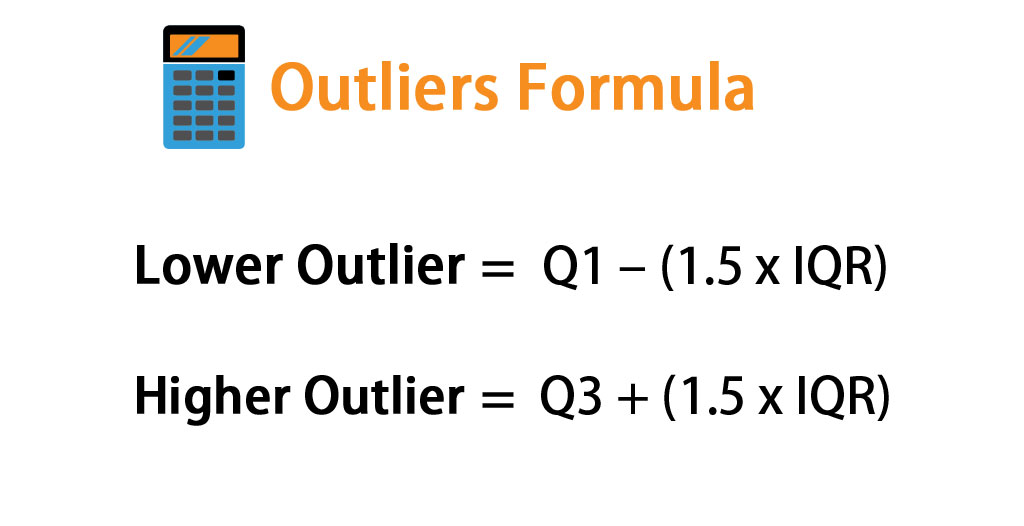

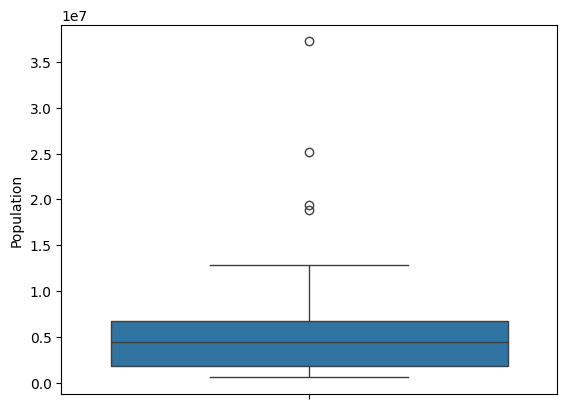

Text(0, 0.5, 'Population (millions)')

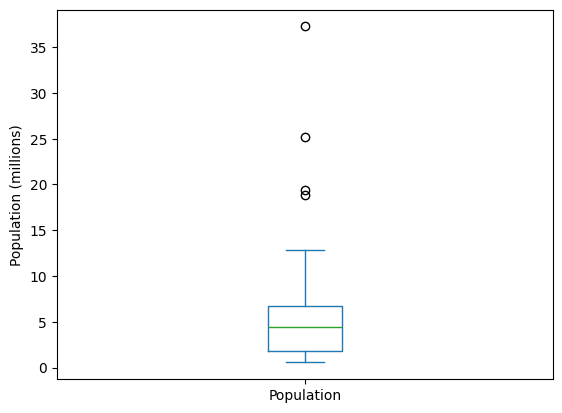

In [27]:
# Box Plot
sn.boxplot(data=state['Population'])
plt.show()

# alternate plotting w/o seaborn
ax = (state['Population'] / 1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

**Frequency Table - divides up the variable range into equally spaced segments**



In [28]:
population = state['Population']
binnedPopulation = pd.cut(population, 10)
print(binnedPopulation.value_counts())
# print(binnedPopulation)
# lhs - bin range, rhs - count

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


**Interpretation**
- Empty bins at the bottom: states where population range doesnt exist
- Experiment with bin size; too granular or too large will make it hard to extract insights

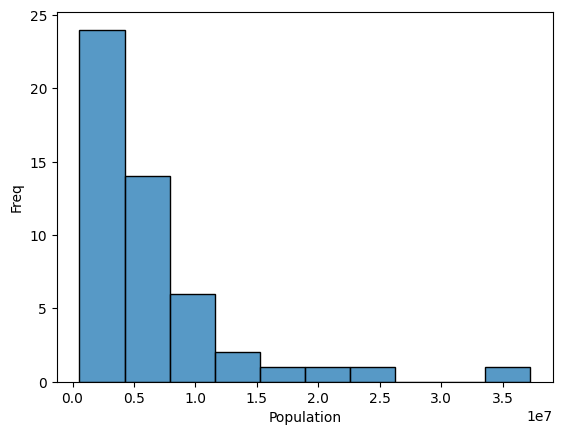

Text(0.5, 0, 'Population (millions)')

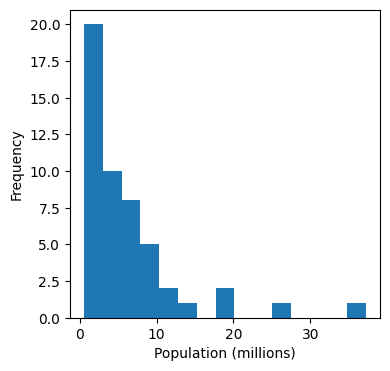

In [29]:
sn.histplot(population, bins=10)
# str is not callable error - may be due to ipynb enviro
# just restart kernal and run all
plt.ylabel('Freq')
plt.show()

# alternate plotting w/o seaborn
# adjust the kwarg for bins
ax = (population / 1_000_000).plot.hist(figsize=(4,4), bins=15)
ax.set_xlabel('Population (millions)')

**Density Plots and Estimates**
- Distr of data values as a continuous line
- "smoothed histogram"
- Plotting as proportion rather than counts

<!-- with pandas implementation -->

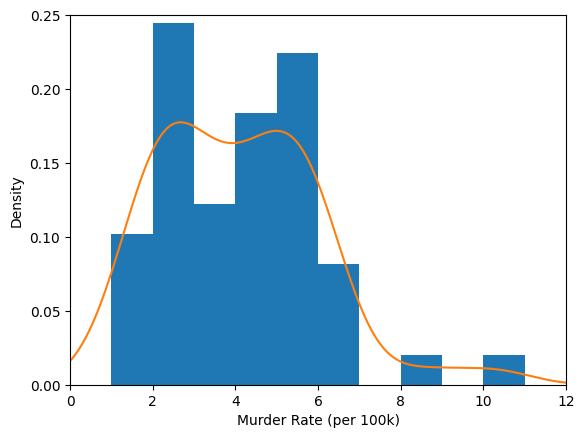

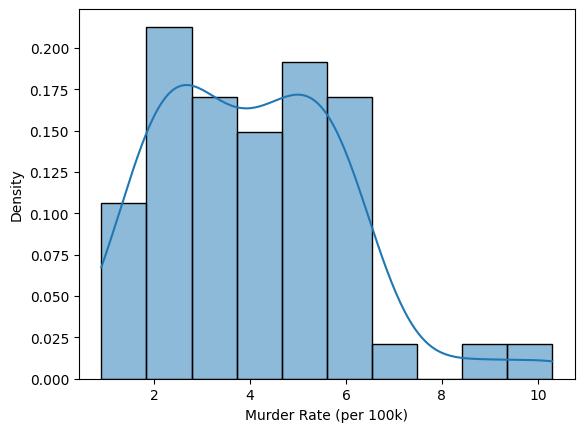

In [30]:
# Density plot with pandas
murderRate = state['Murder.Rate']
ax = murderRate.plot.hist(density=True, xlim=[0, 12], ylim=[0, 0.25], bins=range(1, 12))
murderRate.plot.density(ax=ax) # doesnt work for some reason, histogram doesnt display
ax.set_xlabel('Murder Rate (per 100k)')
plt.show()

# with seaborn
sn.histplot(murderRate, kde=True, stat='density', bins=10)
plt.xlabel('Murder Rate (per 100k)')
plt.ylabel('Density')
plt.show()

# Exploring Binary and Categorical Data
w/scatterplots, corr plots, and barplots


In [31]:
# load new data
dfw = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/dfw_airline.csv')
print(dfw.head())

    Carrier      ATC   Weather  Security    Inbound
0  64263.16  84856.5  11235.42    343.15  118427.82


**Interpretation**
- Mode: most frequently appearing data; inbound in this case

**Expected Value**
- sum of values times their probability of occurence
- i.e. 30% chance of unsub for 100 people + 70% chance of resub for 1000 people

**Categorical Data**
- summed up in proportions and graphed out in bar charts
- represent distinct things, levels of a factor variable (medium, low, or high), or binned numeric data

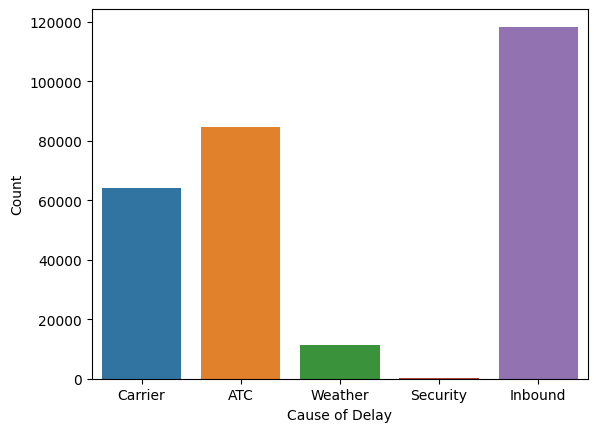

Text(0, 0.5, 'Count')

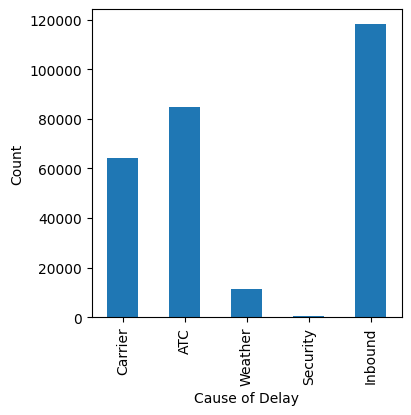

In [32]:
# barplot - show frequency or proportion for each category
sn.barplot(data=dfw)
plt.xlabel('Cause of Delay')
plt.ylabel('Count')
plt.show()

# alternative code with pandas
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

*Correlation and Scatterplots*

Refer to this downloaded lecture for more info on corr methods:
[Spring 2025] Class #24 - Correlation Analysis.pptx.pdf
- Correlation coefficient - metric for the extenti to which numeric vars are associated with one another
  - *calculated as the multiplied devitations from the mean for var 1 * the same for var 2 / product of both vars standard devs
  - lies between -1 and 1
  - sensitive to outliers!

In [33]:
SP500_DATA_CSV = '/content/sp500_data.csv.gz'

sp500_sym = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/sp500_sectors.csv')
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

# print(sp500_sym.head())
# print(sp500_px.head())

**Corr Eval Criteria**
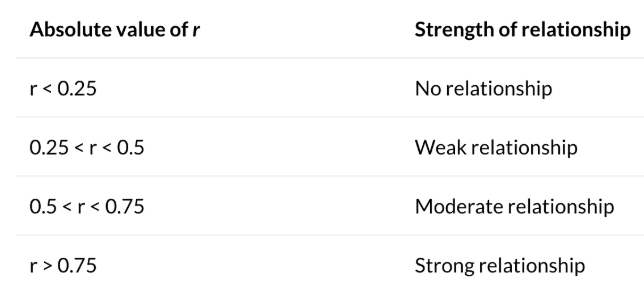

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


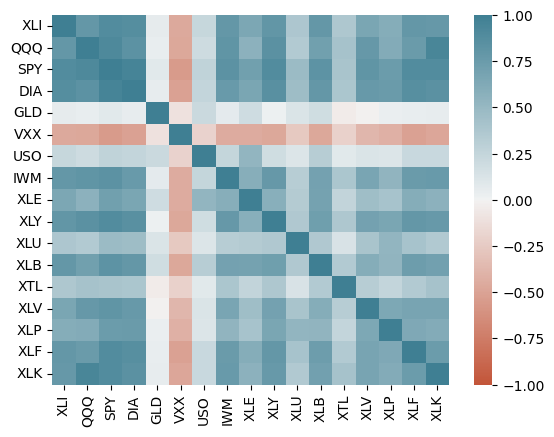

In [34]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
# print(etfs.head())
sn.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sn.diverging_palette(20, 220, as_cmap=True))

# from mike lee's stuff
etfs.corr().style.background_gradient(cmap='Reds', axis=0)


# etfs.corr(method='pearson')

**Using Kendall 's tau and Spearman's rho is not neccesary** even if they are more robust to outliers/nonlinear data; **ig use Pearson**

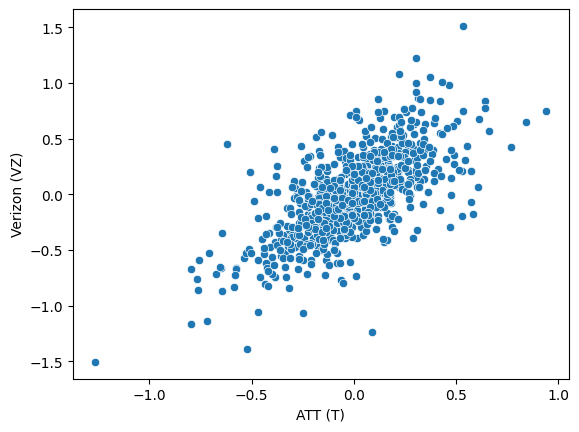

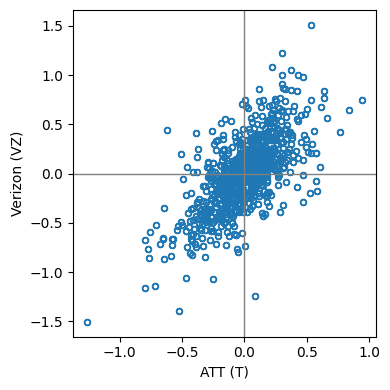

In [35]:
# scatterplot between ATT and Verizon returns
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
sn.scatterplot(data=telecom, x='T', y='VZ')
plt.xlabel('ATT (T)')
plt.ylabel('Verizon (VZ)')
plt.show()

# now using pandas
# using the market specifies open circles
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
# gridlines
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

# Exploring 2+ Variables
w/ contour, violin plots, and contingency tables

**Contour Plots** - topographical maps to two variables, show density of points

(432693, 3)


Text(0, 0.5, 'Tax-Assessed Value')

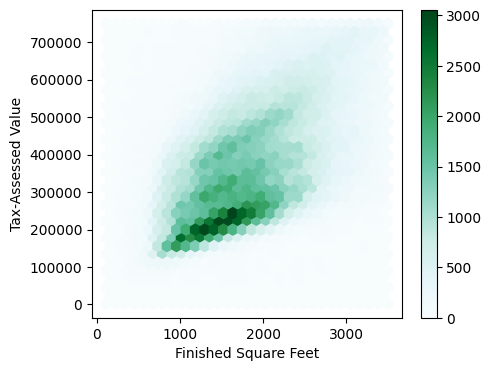

In [36]:
kc_tax = pd.read_csv('/content/kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

# hexagonal binning w/pandas
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [16]:
#seaborn
ax = sn.kdeplot(x=kc_tax0['SqFtTotLiving'], y=kc_tax0['TaxAssessedValue'], fill=True, ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')
plt.show()

In [37]:
lc_loans = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/lc_loans.csv')

crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)

df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


/tmp/ipython-input-37-1934285674.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
/tmp/ipython-input-37-1934285674.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
/tmp/ipython-input-37-1934285674.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.28152849 0.23

# Categorical and Numeric Data

**Numeric Variables Grouped By Categorical Variables**
- Alaska has few delays, American has most

In [38]:
airline_stats = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/airline_stats.csv')

Text(0.5, 0.98, 'Numeric Var (% Delayed Flights) Grouped By Categorical Var (Airlines)')

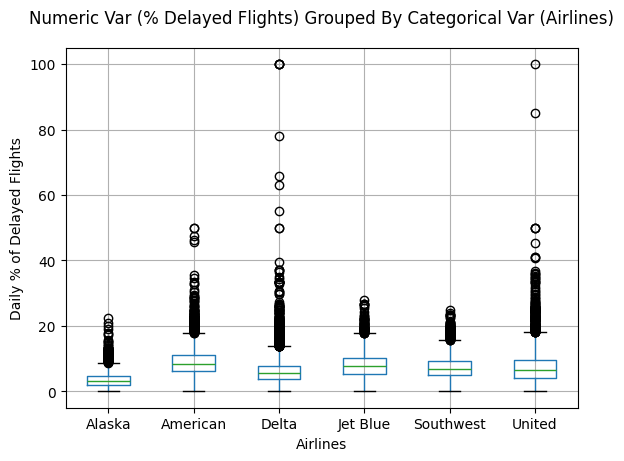

In [39]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('Airlines')
ax.set_ylabel('Daily % of Delayed Flights')
plt.title('')
plt.suptitle('Numeric Var (% Delayed Flights) Grouped By Categorical Var (Airlines)')

**Violin Plot**
- Enhanced boxplot, shows the density estimate with density on the y axis
- More nuanced distribution

Text(0, 0.5, 'Daily % of Delayed Flights')

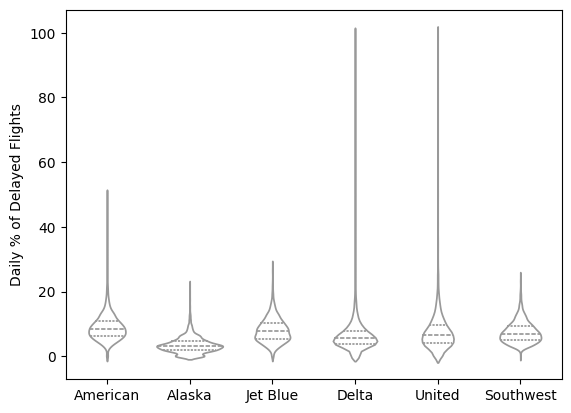

In [40]:
ax = sn.violinplot(x=airline_stats.airline, y=airline_stats.pct_carrier_delay, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

# Visualizing Multiple Variables

**Conditioning**
- way that charts used to compare 2 vars (scatterplots, boxplots, binning) can be extended to more variables
- facets, or conditioning variables, are used
- i.e. zip code for more clustering and graph specialty

Use the args row and col to specify the conditioning vars; or col with col wrap for single contiioning vars to wrap faceted graphs into multiple rows like below

We called map on hexbin fxn with subsets of the original data for the different zip codes, extent defines the limits of the x and y axes

    TaxAssessedValue  SqFtTotLiving  ZipCode
3           361000.0           2000  98108.0
4           459000.0           3150  98108.0
10          202000.0            830  98108.0
11          210000.0           1130  98108.0
12          193000.0           1560  98108.0


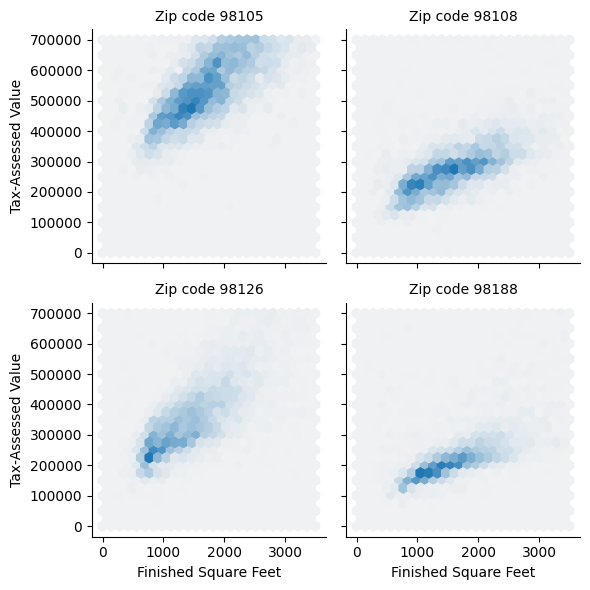

In [41]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
print(kc_tax_zip.head())

def hexbin(x, y, color, **kwargs):
  cmap = sn.light_palette(color, as_cmap=True)
  plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sn.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')